In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df= pd.read_csv('reg_dummy_skill.csv')

In [3]:
df= df.drop(['skill'],axis=1)

In [4]:
df.head(20)

,exp,salary,gender
0,2.0,350000,M
1,3.0,360000,M
2,4.0,400000,M
3,5.0,900000,F
4,5.6,450000,M
5,4.6,750000,M
6,5.6,450000,F
7,7.0,770000,F
8,8.0,1400000,F
9,9.9,900000,M


In [5]:
df['salary']=df['salary']/1000



In [6]:
df.describe(include='object').T

,count,unique,top,freq
gender,34,2,M,17


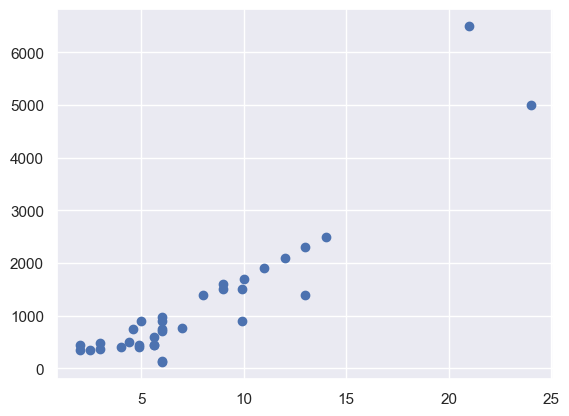

In [7]:
plt.scatter(df.exp,df.salary);

In [8]:
sns.scatterplot(x=df.exp,y=df.salary,hue=df.skill);
plt.legend(loc='upper left');


AttributeError: 'DataFrame' object has no attribute 'skill'

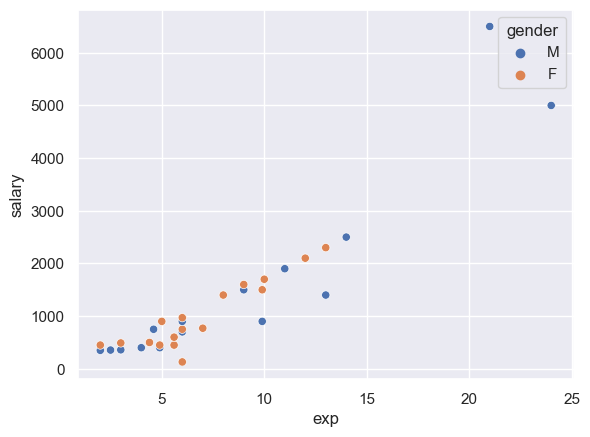

In [9]:
sns.scatterplot(x=df.exp,y=df.salary,hue=df.gender);

In [10]:
import statsmodels.api as sm

In [11]:
len(df)

34

In [12]:
df.head()

,exp,salary,gender
0,2.0,350.0,M
1,3.0,360.0,M
2,4.0,400.0,M
3,5.0,900.0,F
4,5.6,450.0,M


In [13]:
x1= df.iloc[:,[0,2]]
x1.head()

,exp,gender
0,2.0,M
1,3.0,M
2,4.0,M
3,5.0,F
4,5.6,M


In [14]:
y= df.iloc[:,1]
y.head()

0    350.0
1    360.0
2    400.0
3    900.0
4    450.0
Name: salary, dtype: float64

In [15]:
cat_cols=df.describe(include=['object']).columns.tolist()

In [16]:
cat_cols

['gender']

In [17]:
x1=pd.get_dummies(x1,cat_cols,drop_first=True)

In [18]:
x1.head()

,exp,gender_M
0,2.0,1
1,3.0,1
2,4.0,1
3,5.0,0
4,5.6,1


In [19]:
X= sm.add_constant(x1)

In [20]:
X.head()

,const,exp,gender_M
0,1.0,2.0,1
1,1.0,3.0,1
2,1.0,4.0,1
3,1.0,5.0,0
4,1.0,5.6,1


In [21]:
model=sm.OLS(y,X).fit()

In [22]:
len(df)

34

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     85.34
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           2.48e-13
Time:                        10:56:11   Log-Likelihood:                -260.32
No. Observations:                  34   AIC:                             526.6
Df Residuals:                      31   BIC:                             531.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -692.1018    185.221     -3.737      0.001   -1069.862    -314.342
exp          245.5343     19.114     12.846      0.000     206.552     284.517
gender_M      16.4677    186.649      0.088      0.930    -364.205     397.141
==============================================================================
Omnibus:                       22.231   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.530
Skew:                           1.369   Prob(JB):                     6.46e-12
Kurtosis:                       8.374   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see that most females are paid more than males then why is the P values on gender_M so high?

The females are marginally paid higher than males but we have a very few such instances where we have males and females with same experience and then there are two outliers who have high salary who are males which tilts it in males favour. *** Important note*** : If the difference between salary of males and females have been considerable higher with all othere features same then the P values would have been smaller. Right now the difference is just marginal to be statistically significant.  

### Null Hypothesis Salary of male is not different than female